In [1]:
import pysam
import numpy as np
import torch
import pandas as pd

import h5py
import sys
import torch

sys.path.insert(0,'/hpc/compgen/projects/fragclass/analysis/mvivekanandan/script/madhu_scripts')

import config
import utils

import importlib   
import os

import seaborn as sns
import matplotlib.pyplot as plt

importlib.reload(config)
importlib.reload(utils)

arguments = {}
#File paths
arguments["refGenomePath"] = config.filePaths.get("refGenomePath")
arguments["coordStoreDirectory"] = config.filePaths.get("coordStoreDirectory")
arguments["trainingEnformerOuputStoreFile"] = config.filePaths.get("trainingEnformerOuputStoreFile")
arguments["validationEnformerOuputStoreFile"] = config.filePaths.get("validationEnformerOuputStoreFile")
arguments["testEnformerOuputStoreFile"] = config.filePaths.get("testEnformerOuputStoreFile")
arguments["trainingMetadata"] = config.filePaths.get("trainingMetadata")
arguments["validationMetadata"] = config.filePaths.get("validationMetadata")
arguments["testMetadata"] = config.filePaths.get("testMetadata")

#All the datasets
#Coordinate files datasets 
arguments["trainingCoords"] = config.datasetNames.get("trainingCoords")
arguments["validationCoords"] = config.datasetNames.get("validationCoords")
arguments["testCoords"] = config.datasetNames.get("testCoords")

#Labels datasets 
arguments["trainingLabels"] = config.datasetNames.get("trainingLabels")
arguments["validationLabels"] = config.datasetNames.get("validationLabels")
arguments["testLabels"] = config.datasetNames.get("testLabels")

#One hot encoded sequence datasets 
arguments["trainingEncodedSequence"] = config.datasetNames.get("trainingEncodedSequence")
arguments["validationEncodedSequence"] = config.datasetNames.get("validationEncodedSequence")
arguments["testEncodedSequence"] = config.datasetNames.get("testEncodedSequence")

#Enformer output datasets
arguments["trainingEnformerOutput"] = config.datasetNames.get("trainingEnformerOutput")
arguments["validationEnformerOutput"] = config.datasetNames.get("validationEnformerOutput")
arguments["testEnformerOutput"] = config.datasetNames.get("testEnformerOutput")


def getOneHotEncodedSequenceFromCoordinates(coord):
    referenceGenome = pysam.FastaFile(arguments["refGenomePath"])
    coords = (coord[0].decode('UTF-8'), int(coord[1]), int(coord[2]))
    #Get surrounding sequence for feeding into enformer.
    (extendedCoordsEnformer, bins) = utils.getCoordsAndBin(coords, referenceGenome)
    
    #Get the raw sequence using the coordinates and the reference genome.
    cfDnaFragment = utils.getSequenceFromCoord(referenceGenome, extendedCoordsEnformer)
    
    #One hot encode sequence
    encodedFragment = utils.oneHotEncodeSequence(cfDnaFragment)

    encoded_input_sequence = torch.tensor(np.float32(encodedFragment))
    # encoded_input_sequence = encoded_input_sequence.to\(device)
    return encoded_input_sequence, bins

**Get number of training and validation samples in a given coordinate H5PY file**

In [ ]:
sampleType = "test"
coordDirName = "small_latest_test_coords"
fileName = "L1-M13.donor.hdf5"
filePath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/" + coordDirName + "/" + fileName

with h5py.File(filePath, 'r') as f:
    testSamples = f[f"{sampleType}Labels"][:]

#Print stats
pos = (testSamples == 1).sum()
neg = (testSamples == 0).sum()
print(f"TEST: Positives: {pos}, Negatives: {neg} and Total: {pos + neg}")


**Get the number of positives, negatives and total samples in all files combined in a given cooordinate store directory**

In [2]:
sampleType = "test"
dirPath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/latestTwoTestCoordinateFiles"
numSamples = 0
positives = 0
negatives = 0

for filename in os.listdir(dirPath):
    filePath = os.path.join(dirPath, filename)
    with h5py.File(filePath, 'r') as f:
        trainingSamples = f[f"{sampleType}Labels"][:]
        numPositives = (trainingSamples == 1).sum()
        numNegatives = (trainingSamples == 0).sum()
        # print(f"num positives: {numPositives}")
        # print(f"num negatives: {numNegatives}")

    positives = positives + numPositives
    negatives = negatives + numNegatives

print(f"POSITIVES: {positives} and NEGATIVES {negatives}")
print(f"TOTAL : {positives + negatives}")

POSITIVES: 5695 and NEGATIVES 157140
TOTAL : 162835


In [ ]:
test_patients = ['L21-M23.donor.frag.bed.gz', 'L21-M23.recipient.frag.bed.gz', 'L49-M14.donor.frag.bed.gz', 'L49-M14.recipient.frag.bed.gz', 'L5-M13_5.donor.frag.bed.gz', 'L5-M13_5.recipient.frag.bed.gz', 'L34-M6.donor.frag.bed.gz', 'L34-M6.recipient.frag.bed.gz', 'L74-D2-2.donor.frag.bed.gz', 'L74-D2-2.recipient.frag.bed.gz', 'L1-M13.donor.frag.bed.gz', 'L1-M13.recipient.frag.bed.gz', 'L79-M6-1.donor.frag.bed.gz', 'L79-M6-1.recipient.frag.bed.gz', 'L81-W2.donor.frag.bed.gz', 'L81-W2.recipient.frag.bed.gz', 'L59-M12.donor.frag.bed.gz', 'L59-M12.recipient.frag.bed.gz', 'L81-D2-1.donor.frag.bed.gz', 'L81-D2-1.recipient.frag.bed.gz', 'L34-M2-5.donor.frag.bed.gz', 'L34-M2-5.recipient.frag.bed.gz', 'L35-W2.donor.frag.bed.gz', 'L35-W2.recipient.frag.bed.gz', 'L58-M3.donor.frag.bed.gz', 'L58-M3.recipient.frag.bed.gz', 'L81-M3.donor.frag.bed.gz', 'L81-M3.recipient.frag.bed.gz', 'L69-M6.donor.frag.bed.gz', 'L69-M6.recipient.frag.bed.gz', 'L28-M3.donor.frag.bed.gz', 'L28-M3.recipient.frag.bed.gz', 'L16-M23.donor.frag.bed.gz', 'L16-M23.recipient.frag.bed.gz', 'L74-W1.donor.frag.bed.gz', 'L74-W1.recipient.frag.bed.gz', 'L57-M1.donor.frag.bed.gz', 'L57-M1.recipient.frag.bed.gz', 'L68-M12.donor.frag.bed.gz', 'L68-M12.recipient.frag.bed.gz', 'L49-M14-5.donor.frag.bed.gz', 'L49-M14-5.recipient.frag.bed.gz', 'L59-M2-5.donor.frag.bed.gz', 'L59-M2-5.recipient.frag.bed.gz', 'L59-M6.donor.frag.bed.gz', 'L59-M6.recipient.frag.bed.gz', 'L30-M2.donor.frag.bed.gz', 'L30-M2.recipient.frag.bed.gz', 'L30-M1-25.donor.frag.bed.gz', 'L30-M1-25.recipient.frag.bed.gz', 'L49-M16.donor.frag.bed.gz', 'L49-M16.recipient.frag.bed.gz', 'L33-M8.donor.frag.bed.gz', 'L33-M8.recipient.frag.bed.gz', 'L50-M1-5.donor.frag.bed.gz', 'L50-M1-5.recipient.frag.bed.gz', 'L77-D1-1.donor.frag.bed.gz', 'L77-D1-1.recipient.frag.bed.gz', 'L81-M2.donor.frag.bed.gz', 'L81-M2.recipient.frag.bed.gz', 'L85-M9.donor.frag.bed.gz', 'L85-M9.recipient.frag.bed.gz', 'L80-W2.donor.frag.bed.gz', 'L80-W2.recipient.frag.bed.gz', 'L36-W2.donor.frag.bed.gz', 'L36-W2.recipient.frag.bed.gz', 'L4-M25.donor.frag.bed.gz', 'L4-M25.recipient.frag.bed.gz', 'L11-M35.donor.frag.bed.gz', 'L11-M35.recipient.frag.bed.gz', 'L33-M3.donor.frag.bed.gz', 'L33-M3.recipient.frag.bed.gz', 'L50-M14.donor.frag.bed.gz', 'L50-M14.recipient.frag.bed.gz', 'L74-D2-1.donor.frag.bed.gz', 'L74-D2-1.recipient.frag.bed.gz', 'L2-M25.donor.frag.bed.gz', 'L2-M25.recipient.frag.bed.gz', 'L9b-W2.donor.frag.bed.gz', 'L9b-W2.recipient.frag.bed.gz', 'L33-M2-5.donor.frag.bed.gz', 'L33-M2-5.recipient.frag.bed.gz', 'L79-W2.donor.frag.bed.gz', 'L79-W2.recipient.frag.bed.gz', 'L77-D1-3.donor.frag.bed.gz', 'L77-D1-3.recipient.frag.bed.gz', 'L36-M3.donor.frag.bed.gz', 'L36-M3.recipient.frag.bed.gz', 'L25-M18.donor.frag.bed.gz', 'L25-M18.recipient.frag.bed.gz', 'L81-D1.1.donor.frag.bed.gz', 'L81-D1.1.recipient.frag.bed.gz', 'L69-M2.donor.frag.bed.gz', 'L69-M2.recipient.frag.bed.gz', 'L49-M9.donor.frag.bed.gz', 'L49-M9.recipient.frag.bed.gz', 'L36-M14.donor.frag.bed.gz', 'L36-M14.recipient.frag.bed.gz', 'L31-M8.donor.frag.bed.gz', 'L31-M8.recipient.frag.bed.gz', 'L82-M1-5.donor.frag.bed.gz', 'L82-M1-5.recipient.frag.bed.gz']
filename = "L36-M3.recipient.hdf5"
if filename.replace("hdf5", "frag.bed.gz") in test_patients:
    print("yes")
# filepath = os.path.join(dirPath, filename)
# with h5py.File(filepath) as f:
#     print(len(f["testCoords"][:]))


**Get the number of samples in a given encoded sequence H5Y file**
(The donor file you usually use is *L4-M36.donor.hdf5*)

In [19]:
sampleType = "validation"
filePath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/encodedSequenceOutputs/validation_encoded_sequence_final_halfmil.hdf5"
numSamples = 0
list_files = []

with h5py.File(filePath, 'r') as f:
    samples = f[f"{sampleType}EncodedSequence"][:]
    labels = f[f"{sampleType}Labels"][:]
    print(f"samples size is {samples.shape} and labels length is {labels.shape}")
    pos = len(np.where(labels == 1)[0])
    neg = len(np.where(labels == 0)[0])

    print(f"Num postives {pos} and num negatives {neg} and total :: {pos + neg}")



samples size is (248644, 370, 4) and labels length is (248644, 1)
Num postives 124322 and num negatives 124322 and total :: 248644


**Get the number of samples, positives and negatives for an Enformer output H5PY file**

In [17]:
sampleType = "validation"
filePath = f"/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/validation_model_halfmil_attempt_2.hdf5"
numSamples = 0
list_files = []

with h5py.File(filePath, 'r') as f:
    labels = f[f"{sampleType}Labels"][:]
    # samples = f[f"{sampleType}EnformerOutput"][0:10]
    print(f"labels size is {labels.shape}")
    pos = len(np.where(labels == 1)[0])
    neg = len(np.where(labels == 0)[0])
    # print(labels[0:20])

    print(f"Num postives {pos} and num negatives {neg} and total :: {pos + neg}")

labels size is (248644, 1)
Num postives 124322 and num negatives 124322 and total :: 248644


In [13]:
sampleType = "training"
encoded_file = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/encodedSequenceOutputs/trainig_encoded_sequence_final_half_mil.hdf5"
enformer_file = f"/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/training_model_halfmil_attempt_2.hdf5"

with h5py.File(encoded_file, 'r') as f:
    encoded_labels = f[f"{sampleType}Labels"][:]

with h5py.File(enformer_file, 'r') as f:
    enformer_labels = f[f"{sampleType}Labels"][:]

print(encoded_labels[0:10])
print(enformer_labels[0:10])


[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]


**Get a count of the number of samples for which sequence length is not the expected one (196607 * 4)**
1. Fetch the coordinates from original unimputed bed files. 
2. Get the extended coordinates for enformer. 
2. Get the sequence for the extended coordiantes from the reference genome. 

In [ ]:
inputBedFilesDirectory = "/hpc/compgen/projects/gw_cfdna/raw/external_data_haizi/unimputed"
problemCount = 0
columnNames  = ["#chrom", "start", "end", "read_id", "mapq", "cigar1", "cigar2"]
referenceGenome = pysam.FastaFile(arguments["refGenomePath"])

count = 0
for file in os.listdir(inputBedFilesDirectory):
    probCountFile = 0
    count = count + 1
    filename = os.fsencode(file).decode("utf-8")
    print(f"Processing file count {count} and filename {filename}")
    filepath = os.path.join(inputBedFilesDirectory, filename)
    cfdna_frag_df = pd.read_csv(filepath, sep = "\t", names = columnNames, skiprows=11)

    #If this string conversion is not done, for some files, #chrom till 14 are not strings. This creates problems while 
    #matching to the string chromosomes from the all_samples_df
    cfdna_frag_df["#chrom"]= cfdna_frag_df["#chrom"].map(str)

    for index, row in cfdna_frag_df.iterrows():
        coord = (row[0], row[1], row[2])
        (x, y, z, isProb) = utils.getCoordsForEnformer(coord, referenceGenome)

        if isProb:
            probCountFile = probCountFile + 1
                
    print(f"For file {filename}, problem count is {probCountFile}")
    problemCount = probCountFile + problemCount
    if count % 50 == 0:
        print(f"Processed till file {count}, the problemCount is {problemCount}")

print(f"The final problem count is {problemCount}")
    

**Get the one hot encoded sequence for a particular index in the coordinates H5PY file**
(Used for checking if everything is okay with this particular index)

In [ ]:
path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/classBalancedCoordinates/L41-M27.donor.hdf5"
refGenomePath = "/hpc/compgen/projects/fragclass/raw/hg19_genome/hg19_ch1-22_XYM.fa"
with h5py.File(path, 'r') as f:
    #the index with the boundary condition is 856
    data = f[arguments["trainingCoords"]][2488]
    print(data)
    sequence, bins = utils.getOneHotEncodedSequenceFromCoordinates(data, refGenomePath, 215)
    print(sequence.shape)

**Read an Enformer output H5PY file and get the number of samples and labels**

In [ ]:
sampleType = "validation"
fileName = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/training_final_model_500k"
with h5py.File(fileName, 'r') as f:
    # fullData = f[f'{sampleType}EnformerOutput'][:]
    # dataToPrint = fullData[0:10, 0:10]
    # print(f"Printing shape of data {fullData.shape}\n")
    # print(f"Printing some data {dataToPrint}")

    fullLabels = f[f'{sampleType}Labels'][:]
    labelsToPrint = fullLabels[0:10, 0:10]
    print(f"Printing shape of labels {fullLabels.shape}\n")
    print(f"Printing some of the labels {labelsToPrint}")
    pos = len(np.where(fullLabels == 1)[0])
    neg = len(np.where(fullLabels == 0)[0])

    print(f"Positives: {pos} and Negatives: {neg}")


**Read Enformer output H5PY file, round off all values in it and rewrite it to a new file**

In [ ]:
filePath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/enformer_output_validation_270000.hdf5"
enformerOutputDatasetName = "validationEnformerOutput"
labelsDatasetName = "validationLabels"

with h5py.File(filePath, 'r') as f:
    trainingSamples = f[enformerOutputDatasetName][:]
    trainingLabels = f[labelsDatasetName][:]

print("Finished reading the file")
#Round off the training samples and write to a new file. 
numSamples = len(trainingSamples)
print(f"Number of samples read is {numSamples}")
enformerOutputFilePath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/enformer_output_validation_rounded_270000.hdf5"
trainingSamples = np.around(trainingSamples, decimals = 3)
numEnformerOuputSingleSample = 2 * 5313

#Create files and create datasets. 
h5_file = h5py.File(enformerOutputFilePath, "w-")
h5_file.create_dataset(enformerOutputDatasetName,  (numSamples, numEnformerOuputSingleSample),
                                    compression="gzip", compression_opts=8, chunks = (200, numEnformerOuputSingleSample))
h5_file.create_dataset(labelsDatasetName, (numSamples, 1), compression="gzip", compression_opts=8, chunks = (200, 1))

#Store the samples with indices to the created file and datasets 
print(f"Size of enformer output to store is {trainingSamples.shape}")
h5_file[enformerOutputDatasetName][(0):(numSamples),:] = trainingSamples
h5_file[labelsDatasetName][(0):(numSamples),:] = trainingLabels
h5_file.close()

**Get the number of positive and negative samples in the enformer output file**

In [ ]:
importlib.reload(config)

arguments = {}
sampleType = "validation"
filePath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_validation_smaller_subset_ver_2.hdf5"

with h5py.File(filePath, 'r') as f:
    labels = f[f"{sampleType}Labels"][:]
    labels = labels.flatten()
    print(len(labels))
    positives = len(np.where(labels == 1)[0])
    negatives = len(np.where(labels == 0)[0])
    print(f"Positives ::: {positives}, Negatives ::: {negatives}, Total ::: {positives + negatives}")


**Get the sample count of each coordinates file and print a set of files for which sum of samples add upto the specified maximum sample count**

In [ ]:
coordinate_files_dir = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/coordinateFiles"

total_samples = 0
max_sample_count = 3000000
filenames_list = []

for file in os.listdir(coordinate_files_dir):
    filename = os.fsencode(file).decode("utf-8")
    filepath = os.path.join(coordinate_files_dir, filename)
    with h5py.File(filepath, 'r') as f:
        train_data_length = len(f['trainingLabels'][:])
        print(f"Train data length for file {filename} is {train_data_length}")
        total_samples = total_samples + train_data_length
        filenames_list.append(filename)
        if(total_samples > max_sample_count):
            print(f"Total samples is {total_samples} and it exceeded {max_sample_count}")
            break

print(f"total samples is {total_samples}")
print(f"Filenames list is {filenames_list}")
    

**Get the maximum and the minimum length of the cfDNA fragments in a directory**

In [ ]:
coordinate_files_dir = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/biggerSubsetClassBalancedCoordinateFiles"
biggest = 0
for file in os.listdir(coordinate_files_dir):
    filepath = os.path.join(coordinate_files_dir, file)
    with h5py.File(filepath, "r") as f:
        all_coords = f[arguments["trainingCoords"]][:]
        for coord in all_coords:
            length = int(coord[2]) - int(coord[1])
            if(length > biggest):
                biggest = length

print(f"Biggest size is {biggest}")
        


In [ ]:
csv_file = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/performanceMetrics/07_06_16_12_46_training.csv"
df = pd.read_csv(csv_file)
df.head()

In [ ]:
#The labels were "0" for donor and "1" for recipient. The precision recall and other measures for low positive samples 
#work best when the donors are positives and recipient is negative (since the number of donor samples is much lower than the recipients)
#Iterate through the enformer output file and convert all 0 labels to 1 and vice versa. 
new_enformer_output_file = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_validation_270000.hdf5"
old_enformer_output_file = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_validation_270000_wrong_labels.hdf5"
enformerOutputDatasetName = "validationEnformerOutput"
labelsDatasetName = "validationLabels"

#get the data from the previous file and fix length variables
with h5py.File(old_enformer_output_file, "r") as f:
    labels = f[labelsDatasetName][:]
    data = f[enformerOutputDatasetName][:]

numSamples = len(labels)
numEnformerOuputSingleSample = 5313 * 2
print(f"Num samples is {numSamples}")

donorIndices = np.where(labels == 0)[0]
recipIndices = np.where(labels == 1)[0]

labels[donorIndices] = 1
labels[recipIndices] = 0

# Create the dataset in the new file
h5_file = h5py.File(new_enformer_output_file, "w-")
h5_file.create_dataset(enformerOutputDatasetName,  (numSamples, numEnformerOuputSingleSample),
                                    compression="gzip", compression_opts=8, chunks = (200, numEnformerOuputSingleSample))
h5_file.create_dataset(labelsDatasetName, (numSamples, 1), compression="gzip", compression_opts=8, chunks = (200, 1))

h5_file[enformerOutputDatasetName][0:numSamples,:] = data
h5_file[labelsDatasetName][0:numSamples,:] = labels
h5_file.close()

**Take an existing Enformer output file, remove some samples from the dominant class such that the number of positives and negatives are now equal. Store the balanced samples into a new Enformer output file**

In [ ]:
importlib.reload(config)

arguments = {}
trainFilePath = config.filePaths.get("testTrainingEnformerOutputStoreFile")
validationFilePath = config.filePaths.get("testValidationEnformerOutputStoreFile")

with h5py.File(validationFilePath, 'r') as f:
    trainLabels = f["validationLabels"][:]
    print(f"The total number of samples in the file {trainLabels.shape}")
    trainData = f["validationEnformerOutput"][:]

positive_indices = np.where(trainLabels == 1)[0]
num_donors = len(positive_indices)
print(f"Number of positives in the file is {num_donors}")
negative_indices = np.where(trainLabels == 0)[0][:num_donors]

all_labels = np.vstack((trainLabels[positive_indices], trainLabels[negative_indices]))
all_data = np.vstack((trainData[positive_indices], trainData[negative_indices]))
print(f"The shape of all the labels and all the data is {all_labels.shape} and {all_data.shape}")

#Write the balanced data into another h5py file
toWriteTrainEnformerOutputPath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_training_270000_class_balanced"
toWriteValidationEnformerOutputPath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_validation_270000_class_balanced"

#Write train data
enformerOutputDatasetName = "validationEnformerOutput"
labelsDatasetName = "validationLabels"
numSamples = num_donors * 2
numEnformerOuputSingleSample = 10626

#Create H5PY file and create the dataset
h5_file = h5py.File(toWriteValidationEnformerOutputPath, "w-")
h5_file.create_dataset(enformerOutputDatasetName,  (numSamples, numEnformerOuputSingleSample),
                                    compression="gzip", compression_opts=8, chunks = (200, numEnformerOuputSingleSample))
h5_file.create_dataset(labelsDatasetName, (numSamples, 1), compression="gzip", compression_opts=8, chunks = (200, 1))

#write the output to h5py file
endIndex = 0 + num_donors*2
h5_file[enformerOutputDatasetName][(0):(endIndex),:] = all_data
h5_file[labelsDatasetName][(0):(endIndex),:] = all_labels

h5_file.close()


**Copy some samples from enformer output file to another file**

In [ ]:
old_file_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_training_class_balanced.hdf5"
new_file_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/enformer_output_class_balanced_first_one_mil.hdf5"

new_h5_file = h5py.File(new_file_path, "w-")
enformerOutputDatasetName = "trainingEnformerOutput"
labelsDatasetName = "trainingLabels"

numSamples = 1023232
numEnformerOuputSingleSample = 2*5313

new_h5_file.create_dataset(enformerOutputDatasetName,  (numSamples, numEnformerOuputSingleSample),
                                    compression="gzip", compression_opts=8, chunks = (200, numEnformerOuputSingleSample))
new_h5_file.create_dataset(labelsDatasetName,  (numSamples, 1),
                                    compression="gzip", compression_opts=8, chunks = (200, 1))

with h5py.File(old_file_path, 'r') as f:
    #250000 - 500000
    enformerData1 = f[enformerOutputDatasetName][0:250000]
    labels1 = f[labelsDatasetName][0:250000]

    new_h5_file[enformerOutputDatasetName][0:250000, :] = enformerData1
    new_h5_file[labelsDatasetName][0:250000, :] = labels1

    #250000 - 500000
    enformerData2 = f[enformerOutputDatasetName][250000:500000]
    labels2 = f[labelsDatasetName][250000:500000]

    new_h5_file[enformerOutputDatasetName][250000:500000, :] = enformerData2
    new_h5_file[labelsDatasetName][250000:500000, :] = labels2

    #500000 - 750000
    enformerData3 = f[enformerOutputDatasetName][500000:750000]
    labels3 = f[labelsDatasetName][500000:750000]

    new_h5_file[enformerOutputDatasetName][500000:750000, :] = enformerData3
    new_h5_file[labelsDatasetName][500000:750000, :] = labels3

    #750000 - 1000000
    enformerData4 = f[enformerOutputDatasetName][750000:1000000]
    labels4 = f[labelsDatasetName][750000:1000000]

    new_h5_file[enformerOutputDatasetName][750000:1000000, :] = enformerData4
    new_h5_file[labelsDatasetName][750000:1000000, :] = labels4

    #1000000 - 1023232
    enformerData5 = f[enformerOutputDatasetName][1000000:1023232]
    labels5 = f[labelsDatasetName][1000000:1023232]

    new_h5_file[enformerOutputDatasetName][1000000:1023232, :] = enformerData5
    new_h5_file[labelsDatasetName][1000000:1023232, :] = labels5


new_h5_file.close()

**Shuffle samples in a file**

In [17]:
sampleType = "validation"
enformer_file = f"/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/validation_final_model_125k_non_shuffled.hdf5"
new_h5_file_path = f"/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/validation_final_model_125k.hdf5"

new_h5_file = h5py.File(new_h5_file_path, "w-")

with h5py.File(enformer_file, 'r') as f:
    numSamples = len(f[f"{sampleType}Labels"][:])

enformerOutputDatasetName = f"{sampleType}EnformerOutput"
labelsDatasetName = f"{sampleType}Labels"

numEnformerOuputSingleSample = 2*5313

new_h5_file.create_dataset(enformerOutputDatasetName,  (numSamples, numEnformerOuputSingleSample),
                                    compression="gzip", compression_opts=8, chunks = (200, numEnformerOuputSingleSample))
new_h5_file.create_dataset(labelsDatasetName,  (numSamples, 1),
                                    compression="gzip", compression_opts=8, chunks = (200, 1))

with h5py.File(enformer_file, 'r') as f:
    labels = f[labelsDatasetName][:]
    enformerOutput = f[enformerOutputDatasetName][:]
    np.random.seed(42)
    np.random.shuffle(enformerOutput)
    np.random.seed(42)
    np.random.shuffle(labels)

new_h5_file[enformerOutputDatasetName][0:numSamples, :] = enformerOutput
new_h5_file[labelsDatasetName][0:numSamples, :] = labels

new_h5_file.close()

# indices = list(range(0, numSamples))
# random.shuffle(indices)
# with h5py.File(enformer_file, 'r') as f:
#     indices1 = sort(indices[0:5000])
#     labels1 = f[labelsDatasetName][indices1]
#     enformerOutput1 = f[enformerOutputDatasetName][indices1]
    
#     new_h5_file[enformerOutputDatasetName][0:5000, :] = enformerOutput1
#     new_h5_file[labelsDatasetName][0:5000, :] = labels1

#     #-----
#     indices2 = sort(indices[5000:10000])
#     labels2 = f[labelsDatasetName][indices2]
#     enformerOutput2 = f[enformerOutputDatasetName][indices2]
    
#     new_h5_file[enformerOutputDatasetName][5000:10000, :] = enformerOutput2
#     new_h5_file[labelsDatasetName][5000:10000, :] = labels2

#     #-----
#     indices3 = sort(indices[10000:15000])
#     labels3 = f[labelsDatasetName][indices3]
#     enformerOutput3 = f[enformerOutputDatasetName][indices3]
    
#     new_h5_file[enformerOutputDatasetName][10000:15000, :] = enformerOutput3
#     new_h5_file[labelsDatasetName][10000:15000, :] = labels3

#     #-----
#     indices4 = sort(indices[15000:numSamples])
#     labels4 = f[labelsDatasetName][indices4]
#     enformerOutput4 = f[enformerOutputDatasetName][indices4]
    
#     new_h5_file[enformerOutputDatasetName][15000:numSamples, :] = enformerOutput4
#     new_h5_file[labelsDatasetName][15000:numSamples, :] = labels4

**Get the maximum value of the indexInFile column in the enformer metadata file**

In [ ]:
enformerMetadataFile = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/metadataFiles/validation_metadata_smaller_subset_ver_2.csv"
coordStoreDir = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/subsetClassBalancedCoordinateFiles"
indices_list = []
def convert_index_to_int(str_index):
    return int(str_index[str_index.find("(")+1: str_index.find(")")])

df = pd.read_csv(enformerMetadataFile, sep = "\t", names=["og_file", "indexInFile"], skiprows=1)
print(f"Number of entries in the CSV file: {len(df)}")
df["indexInFile"] = df["indexInFile"].apply(convert_index_to_int)
index_max = df["indexInFile"].idxmax()
val_max = df["indexInFile"].max()
og_file = df["og_file"].iloc[index_max]

#The metadata df has the entire path according to old coordinate directory. Get filename and new filepath acc. to new location
filename = os.path.basename(og_file)

print(f"Index is {val_max} and filename is {filename}")


**Get unique patients list**

In [ ]:
import os
dirPath = "/hpc/compgen/projects/gw_cfdna/raw/external_data_haizi/unimputed"
names = []
for filename in os.listdir(dirPath):
    names.append(filename.split("-")[0])

unique_names = set(names)
print(len(unique_names))

In [ ]:
inputBedFilesDirectory = "/hpc/compgen/projects/gw_cfdna/raw/external_data_haizi/unimputed"
donor_count = 0
recipient_count = 0
columnNames  = ["#chrom", "start", "end", "read_id", "mapq", "cigar1", "cigar2"]
referenceGenome = pysam.FastaFile(arguments["refGenomePath"])
count = 0

for filename in os.listdir(inputBedFilesDirectory):
    count = count + 1
    print(f"Processing file count {count} and filename {filename}")
    filepath = os.path.join(inputBedFilesDirectory, filename)
    df = pd.read_csv(filepath, sep = "\t", names = columnNames, skiprows=11)
    if("donor" in filename):
        donor_count = donor_count + len(df)
    elif("recipient" in filename):
        recipient_count = recipient_count + len(df)

print(donor_count)
print(recipient_count)

**Get the length of the longest fragment in a coordinate file store directory**

In [ ]:
dir = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationCoordinateFiles"

big_length = 0
count = 0

for filename in os.listdir(dir):
    filepath = os.path.join(dir, filename)
    with h5py.File(filepath) as f:

        # trainingSamples = f["trainingCoords"][:]
        # for coord in trainingSamples:
        #     count = count + 1
        #     length = int(coord[2]) - int(coord[1])
        #     if(length > big_length):
        #         big_length = length
        
        validationSamples = f["trainingCoords"][:]
        for coord in validationSamples:
            count = count + 1
            length = int(coord[2]) - int(coord[1])
            if(length > big_length):
                big_length = length

print(f"Longest : {big_length} and count : {count}")

**In a given coordinate directory, get the samples which are too close to the edges**

In [ ]:

allowed_distance_from_edges = 100000
dir_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationExactlyClassBalanced"

refGenomePath = arguments["refGenomePath"]
refGenome = pysam.FastaFile(refGenomePath)

chrom_len_map = {}
for i in range(1, 23):
    chrom = str(i)
    length = refGenome.get_reference_length("chr" + chrom)
    chrom_len_map[chrom] = length

length_x = refGenome.get_reference_length("chrX")
length_y = refGenome.get_reference_length("chrY")
chrom_len_map["X"] = length_x
chrom_len_map["Y"] = length_y

print(chrom_len_map)
training_filename_index = {}
valid_filename_index = {}

for filename in os.listdir(dir_path):
    filepath = os.path.join(dir_path, filename)
    with h5py.File(filepath, 'r') as f:
        coords = f["trainingCoords"][:]
        for i in range(len(coords)):
            x, y, z = coords[i]
            chrom = x.decode('UTF-8')
            start = int(y)
            end = int(z)
            if(start < allowed_distance_from_edges):
                print(f"Start {start} for filename {filename} and index {i} is not proper")
            if(end >=  chrom_len_map[chrom] - allowed_distance_from_edges):
                print(f"End {end} for filename {filename} and index {i} is not proper")
                if filename not in training_filename_index:
                    training_filename_index[filename] = []
                training_filename_index[filename].append(i)
        

        valid_coords = f["validationCoords"][:]
        for i in range(len(valid_coords)):
            x, y, z = valid_coords[i]
            chrom = x.decode('UTF-8')
            start = int(y)
            end = int(z)
            if(start < allowed_distance_from_edges):
                print(f"Start {start} for filename {filename} and index {i} is not proper")
            if(end >=  chrom_len_map[chrom] - allowed_distance_from_edges):
                print(f"End {end} for filename {filename} and index {i} is not proper")
                if filename not in valid_filename_index:
                    valid_filename_index[filename] = []
                valid_filename_index[filename].append(i)

print(training_filename_index)
print(valid_filename_index)

**Go through the coordinate file directory, copy only samples that are not in the edges to another directory**
**This was created because the coordinate directory I created had some samples which were close to the ends (even though this condition was applied while creating these files). so we need to remove the problematic samples, easiest way is to create a new folder and copy over only the non-problematic samples**

**The samples indices which don't follow the rules are copied into a dict along with their fileames in the previous cell**


In [ ]:
arguments = {}
arguments['coordStoreDirectory'] = config.filePaths.get("coordStoreDirectory")
arguments["trainingCoordsDatasetName"] = config.datasetNames.get("trainingCoords")
arguments["validationCoordsDatasetName"] = config.datasetNames.get("validationCoords")
arguments["trainingLabelsDatasetName"] = config.datasetNames.get("trainingLabels")
arguments["validationLabelsDatasetName"] = config.datasetNames.get("validationLabels")


dir_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationExactlyClassBalancedWithEndFragments"
new_dir_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationExactlyClassBalanced"

for filename in os.listdir(dir_path):
    print(f"Processing filename {filename}")
    filepath = os.path.join(dir_path, filename)
    with h5py.File(filepath, 'r') as f:
        training_samples = f[arguments["trainingCoordsDatasetName"]][:]
        valid_samples = f[arguments["validationCoordsDatasetName"]][:]
        trainingLabels = f[arguments["trainingLabelsDatasetName"]][:]
        validationLabels = f[arguments["validationLabelsDatasetName"]][:]
    
    train_df = pd.DataFrame(data = training_samples, columns = ["chrom", "start", "end"])
    valid_df = pd.DataFrame(data = valid_samples, columns = ["chrom", "start", "end"])

    # print(f"For filename {filename}, before dropping train_df {len(train_df)}, valid_df: {len(valid_df)}")
    if filename in training_filename_index:
        train_df = train_df.drop(training_filename_index[filename])
    
    if filename in valid_filename_index:
        valid_df = valid_df.drop(valid_filename_index[filename])
    
    train_df.reset_index(inplace=True, drop=True)
    valid_df.reset_index(inplace=True, drop=True)
    # print(f"For filename {filename}, after dropping train_df {len(train_df)}, valid_df: {len(valid_df)}")

    new_file_path = os.path.join(new_dir_path, filename)
    with h5py.File(new_file_path, 'w') as h5_file:
        print(f"Writing into filename: {new_file_path}")
        h5_file.create_dataset(arguments["trainingCoordsDatasetName"], data=train_df.astype(str).to_numpy(), compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["trainingLabelsDatasetName"], data=trainingLabels, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationCoordsDatasetName"], data=valid_df.astype(str).to_numpy(), compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationLabelsDatasetName"], data=validationLabels, compression = "gzip", compression_opts=9)

**Randomly remove some files to bring the number of fragments from 1 Million to 500k**
**If we remove only some patients, then the remaining 15 or so patients will have many different fragments, many will be a repeat because they were taken at different time points. This could lead to overfitting**

In [ ]:
import random

num_donors_remove = 1
dir_name = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationExactlyClassBalancedOneMillion"

donors_list = []
# for filename in os.listdir(dir_name):
#     if "recipient" in filename: continue
#     donors_list.append(filename)

# print(f"Num donors: {len(donors_list)}")

# indices_to_remove = random.sample(range(0, len(donors_list)), num_donors_remove)
# print(f"Indices to remove: {indices_to_remove}")

# donors_to_remove = [donors_list[i] for i in indices_to_remove]
# print(f"Donots to remove : {len(donors_to_remove)}")

# for donor in donors_to_remove:
#     donor_path = os.path.join(dir_name, donor)
#     recip_path = donor_path.replace("donor", "recipient")
#     os.remove(donor_path)
#     os.remove(recip_path)

print("Printing the number of samples in the dir")
sampleType = "training"
numSamples = 0
positives = 0
negatives = 0

for filename in os.listdir(dir_name):
    filePath = os.path.join(dir_name, filename)
    with h5py.File(filePath, 'r') as f:
        trainingSamples = f[f"{sampleType}Labels"][:]
        numPositives = (trainingSamples == 1).sum()
        numNegatives = (trainingSamples == 0).sum()
        # print(f"num positives: {numPositives}")
        # print(f"num negatives: {numNegatives}")

    positives = positives + numPositives
    negatives = negatives + numNegatives

print(f"POSITIVES: {positives} and NEGATIVES {negatives}")
print(f"TOTAL : {positives + negatives}")


**Make number of samples in donor and recipient files exactly equal** 
(Sometimes, even after undersampling the recipients, after removing end fragments, splitting based on chromosomes etc the number of recipients and donors could have a slight imbalance. This biases the model, so we make eveything exactly the same)

In [ ]:
import random

arguments["trainingCoordsDatasetName"] = config.datasetNames.get("trainingCoords")
arguments["validationCoordsDatasetName"] = config.datasetNames.get("validationCoords")
arguments["testCoordsDatasetName"] = config.datasetNames.get("testCoords")
arguments["trainingLabelsDatasetName"] = config.datasetNames.get("trainingLabels")
arguments["validationLabelsDatasetName"] = config.datasetNames.get("validationLabels")
arguments["testLabelsDatasetName"] = config.datasetNames.get("testLabels")

def getLabelsForData(dataNumpy, label):
    nrows, ncols = dataNumpy.shape
    if label == 0:
        return np.zeros(nrows).reshape(nrows, 1)
    if label == 1:
        return np.ones(nrows).reshape(nrows, 1)
    else:
        print(f"Invalid label for data : {label}")
        raise SystemExit(1)


dir_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationCoordFilesEndFragsRemovedOneMilComplete"
new_dir_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/trainingAndValidationExactlyClassBalancedOneMillion"
for filename in os.listdir(dir_path):
    if "recipient" in filename: continue 
    donor_path = os.path.join(dir_path, filename)
    recip_path = donor_path.replace("donor", "recipient")

    with h5py.File(donor_path, 'r') as f:
        donor_training = f["trainingCoords"][:]
        donor_validation = f["validationCoords"][:]
    
    with h5py.File(recip_path, 'r') as f:
        recip_training = f["trainingCoords"][:]
        recip_validation = f["validationCoords"][:]
    
    min_training_length = min(len(donor_training), len(recip_training))
    min_validation_length = min(len(donor_validation), len(recip_validation))

    train_indices = random.sample(range(0, min_training_length), min_training_length)
    validation_indices = random.sample(range(0, min_validation_length), min_validation_length)

    new_donor_training = donor_training[train_indices]
    new_donor_validation= donor_validation[validation_indices]
    new_recip_training = recip_training[train_indices]
    new_recip_validation = recip_validation[validation_indices]

    donor_training_labels = getLabelsForData(new_donor_training, 1)
    donor_validation_labels = getLabelsForData(new_donor_validation, 1)
    recip_training_labels = getLabelsForData(new_recip_training, 0)
    recip_validation_labels = getLabelsForData(new_recip_validation, 0)

    donor_file_name = filename
    recip_file_name = donor_file_name.replace("donor", "recipient")
    new_donor_path = os.path.join(new_dir_path, donor_file_name)
    new_recip_path = os.path.join(new_dir_path, recip_file_name)
    print(f"Filename: {donor_file_name} training data: {len(new_donor_training)}, training labels: {len(donor_training_labels)}, validation data: : {len(new_donor_validation)} and validation labels: {len(donor_validation_labels)}")
    print(f"Filename: {recip_file_name} training data: {len(new_recip_training)}, training labels: {len(recip_training_labels)}, validation data: : {len(new_recip_validation)} and validation labels: {len(recip_validation_labels)}")
    
    with h5py.File(new_donor_path, 'w') as h5_file:
        h5_file.create_dataset(arguments["trainingCoordsDatasetName"], data=new_donor_training, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["trainingLabelsDatasetName"], data=donor_training_labels, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationCoordsDatasetName"], data=new_donor_validation, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationLabelsDatasetName"], data=donor_validation_labels, compression = "gzip", compression_opts=9)
    

    with h5py.File(new_recip_path, 'w') as h5_file:
        h5_file.create_dataset(arguments["trainingCoordsDatasetName"], data=new_recip_training, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["trainingLabelsDatasetName"], data=recip_training_labels, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationCoordsDatasetName"], data=new_recip_validation, compression = "gzip", compression_opts=9)
        h5_file.create_dataset(arguments["validationLabelsDatasetName"], data=recip_validation_labels, compression = "gzip", compression_opts=9)


**Make the number of donors and recipients in Enformer output H5PY file exactly the same** (Already takes into account reading only part of the file)

In [9]:
import random

sampleType = "validation"
filepath = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/validation_final_model_1_mil.hdf5"
with h5py.File(filepath, 'r') as f:
    samples = f[f"{sampleType}EnformerOutput"][0:144720]
    labels = f[f"{sampleType}Labels"][0:144720]

recip_indices = np.where(labels == 0)[0]
donor_indices = np.where(labels == 1)[0]
donors = samples[donor_indices]
recips = samples[recip_indices]

print(donors.shape)
print(recips.shape)

num_donors = len(donor_indices)
num_recips = len(recip_indices)
print(f"Num donors: {num_donors} and num recips: {num_recips}")
min_training_length = min(num_donors, num_recips)
print(f"Min training length : {min_training_length}")

donor_indices_sampled = random.sample(donor_indices.tolist(), min_training_length)
recip_indices_sampled = random.sample(recip_indices.tolist(), min_training_length)
print(f"After sampling.. num donors: {len(donor_indices_sampled)} and num recips:  {len(recip_indices_sampled)}")

all_indices_new = []
all_indices_new.extend(donor_indices_sampled)
all_indices_new.extend(recip_indices_sampled)
print(f"All indices new length: {len(all_indices_new)}")

samples_new = samples[all_indices_new]
labels_new = labels[all_indices_new]
print(samples_new.shape)
print(labels_new.shape)

new_enformer_file_path = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/EnformerOutputs/validation_final_model_125k_non_shuffled.hdf5"
with h5py.File(new_enformer_file_path, 'w') as h5_file:
    h5_file.create_dataset(f"{sampleType}EnformerOutput", data=samples_new, compression = "gzip", compression_opts=9, chunks = (200, 10626))
    h5_file.create_dataset(f"{sampleType}Labels", data=labels_new, compression = "gzip", compression_opts=9, chunks = (200, 1))

(72127, 10626)
(72593, 10626)
Num donors: 72127 and num recips: 72593
Min training length : 72127
After sampling.. num donors: 72127 and num recips:  72127
All indices new length: 144254
(144254, 10626)
(144254, 1)


**Plot confusion matrix from TP, FP, TN and FN**

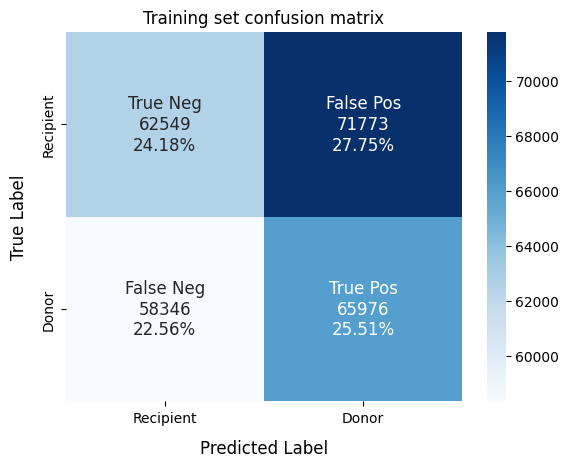

In [2]:
cf_matrix = np.array([[33784, 26425], [32215, 27751]])
cf_matrix = np.array([[62549, 71773], [58346, 65976]])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
cf_matrix_labels    = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
cf_matrix_labels = np.asarray(cf_matrix_labels).reshape(2,2)
    
s = sns.heatmap(cf_matrix, annot=cf_matrix_labels, fmt = '', cmap="Blues", annot_kws={"fontsize":12})
s.set_xticklabels(["Recipient", "Donor"])
s.set_yticklabels(["Recipient", "Donor"])

s.set_xlabel("Predicted Label", fontsize=12, labelpad=10)
s.set_ylabel("True Label", fontsize=12, labelpad=10)
plt.title("Training set confusion matrix")
plt.show()

In [3]:
dir = "/hpc/compgen/projects/fragclass/analysis/mvivekanandan/output/latestTestCoordinateFiles"
print(len(os.listdir(dir)))

102


In [1]:
list = ["L36-M3.recipient.hdf5","L33-M8.recipient.hdf5", "L80-W2.donor.hdf5","L79-W2.donor.hdf5","L68-M12.donor.hdf5","L77-D1-1.donor.hdf5","L81-M2.donor.hdf5","L58-M3.recipient.hdf5","L59-M12.recipient.hdf5","L9b-W2.donor.hdf5","L81-M2.recipient.hdf5","L82-M1-5.donor.hdf5","L74-W1.donor.hdf5","L81-D1.1.donor.hdf5","L16-M23.recipient.hdf5","L1-M13.recipient.hdf5","L77-D1-3.donor.hdf5","L33-M3.recipient.hdf5","L85-M9.donor.hdf5","L34-M6.recipient.hdf5","L33-M3.donor.hdf5","L81-D2-1.recipient.hdf5","L81-W2.recipient.hdf5","L5-M13_5.donor.hdf5","L33-M8.donor.hdf5","L34-M6.donor.hdf5","L77-D1-3.recipient.hdf5","L16-M23.donor.hdf5","L49-M14-5.recipient.hdf5","L59-M6.donor.hdf5","L81-D1.1.recipient.hdf5","L49-M14.recipient.hdf5","L35-W2.donor.hdf5","L59-M2-5.recipient.hdf5","L30-M2.recipient.hdf5","L33-M2-5.recipient.hdf5","L74-D2-1.recipient.hdf5","L33-M2-5.donor.hdf5","L2-M25.donor.hdf5","L68-M12.recipient.hdf5","L69-M6.donor.hdf5","L49-M9.donor.hdf5","L35-W2.recipient.hdf5","L4-M25.recipient.hdf5","L74-D2-2.donor.hdf5","L81-M3.donor.hdf5","L79-M6-1.donor.hdf5","L9b-W2.recipient.hdf5","L69-M6.recipient.hdf5","L80-W2.recipient.hdf5","L82-M1-5.recipient.hdf5","L69-M2.donor.hdf5","L30-M2.donor.hdf5","L69-M2.recipient.hdf5","L5-M13_5.recipient.hdf5","L81-M3.recipient.hdf5","L74-D2-1.donor.hdf5","L11-M35.recipient.hdf5","L2-M25.recipient.hdf5","L36-W2.donor.hdf5","L31-M8.recipient.hdf5","L59-M6.recipient.hdf5","L25-M18.recipient.hdf5"]
new_list = []
for filename in list:
    if "recipient" in filename: continue
    recip_file = filename.replace("donor", "recipient")
    if(recip_file in list):
        new_list.append(filename)
        new_list.append(recip_file)

print(new_list)

['L80-W2.donor.hdf5', 'L80-W2.recipient.hdf5', 'L68-M12.donor.hdf5', 'L68-M12.recipient.hdf5', 'L81-M2.donor.hdf5', 'L81-M2.recipient.hdf5', 'L9b-W2.donor.hdf5', 'L9b-W2.recipient.hdf5', 'L82-M1-5.donor.hdf5', 'L82-M1-5.recipient.hdf5', 'L81-D1.1.donor.hdf5', 'L81-D1.1.recipient.hdf5', 'L77-D1-3.donor.hdf5', 'L77-D1-3.recipient.hdf5', 'L33-M3.donor.hdf5', 'L33-M3.recipient.hdf5', 'L5-M13_5.donor.hdf5', 'L5-M13_5.recipient.hdf5', 'L33-M8.donor.hdf5', 'L33-M8.recipient.hdf5', 'L34-M6.donor.hdf5', 'L34-M6.recipient.hdf5', 'L16-M23.donor.hdf5', 'L16-M23.recipient.hdf5', 'L59-M6.donor.hdf5', 'L59-M6.recipient.hdf5', 'L35-W2.donor.hdf5', 'L35-W2.recipient.hdf5', 'L33-M2-5.donor.hdf5', 'L33-M2-5.recipient.hdf5', 'L2-M25.donor.hdf5', 'L2-M25.recipient.hdf5', 'L69-M6.donor.hdf5', 'L69-M6.recipient.hdf5', 'L81-M3.donor.hdf5', 'L81-M3.recipient.hdf5', 'L69-M2.donor.hdf5', 'L69-M2.recipient.hdf5', 'L30-M2.donor.hdf5', 'L30-M2.recipient.hdf5', 'L74-D2-1.donor.hdf5', 'L74-D2-1.recipient.hdf5']
